In [112]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, r2_score,plot_roc_curve

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [59]:
df = pd.read_csv(r"C:\Users\smith\OneDrive\Documents\Datascience\Evaluation-Projects\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values so good to go<br>
Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18 and OverTime features are of object type which needs to be encoded

In [7]:
print(df['Attrition'].value_counts())
print(df['BusinessTravel'].value_counts())
print(df['Department'].value_counts())
print(df['EducationField'].value_counts())
print(df['Gender'].value_counts())
print(df['JobRole'].value_counts())
print(df['MaritalStatus'].value_counts())
print(df['Over18'].value_counts())
print(df['OverTime'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

Over18 feature contails all same values in it so can drop this feature and drop if any duplicate data

In [60]:
#Drop duplicates if any and nominal features
df.drop_duplicates(inplace=True)
df = df.drop(['Over18'],axis=1)

In [9]:
df.shape

(1470, 34)

In [61]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Gender'] = le.fit_transform(df['Gender'])
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0             2               1              1               1  ...   
1             1               1              1               2  ...   
2             2               4              1               4  ...   
3             4               1              1               5  ...   
4             1               3              1               7  ...   
...         ...             ...            ...             ...  ...   
1465          2               3              1            2061  ...   
1466          1               3              1            2062  ...   
1467          3               1              1            2064  ...   
1468          3               3              1            2065  ...   
1469          3               3              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             80                 0   
1469                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466              

In [11]:
df.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       1470.000000  1470.000000     1470.000000         1470.0   
mean           9.192517     2.912925        2.247619            1.0   
std            8.106864     1.024165        1.331369            0.0   
min            1.000000     1.000000        0.000000            1.0   
25%            2.000000     2.000000        1.000000            1.0   
50%            7.000000     3.000000        2.000000            1.0   
75%           14.000000     4.000000        3.000000            1.0   
max           29.000000     5.000000        5.000000            1.0   

       EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean      1024.865306  ...                  2.712245           80.0   
std        602.024335  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%        491.250000  ...                  2.000000           80.0   
50%       1020.500000  ...                  3.000000           80.0   
75%       1555.750000  ...                  4.000000           80.0   
max       2068.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 34 columns]

There exists outliers in DistanceFromHome,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.<br>
Let us visualize the data distribution

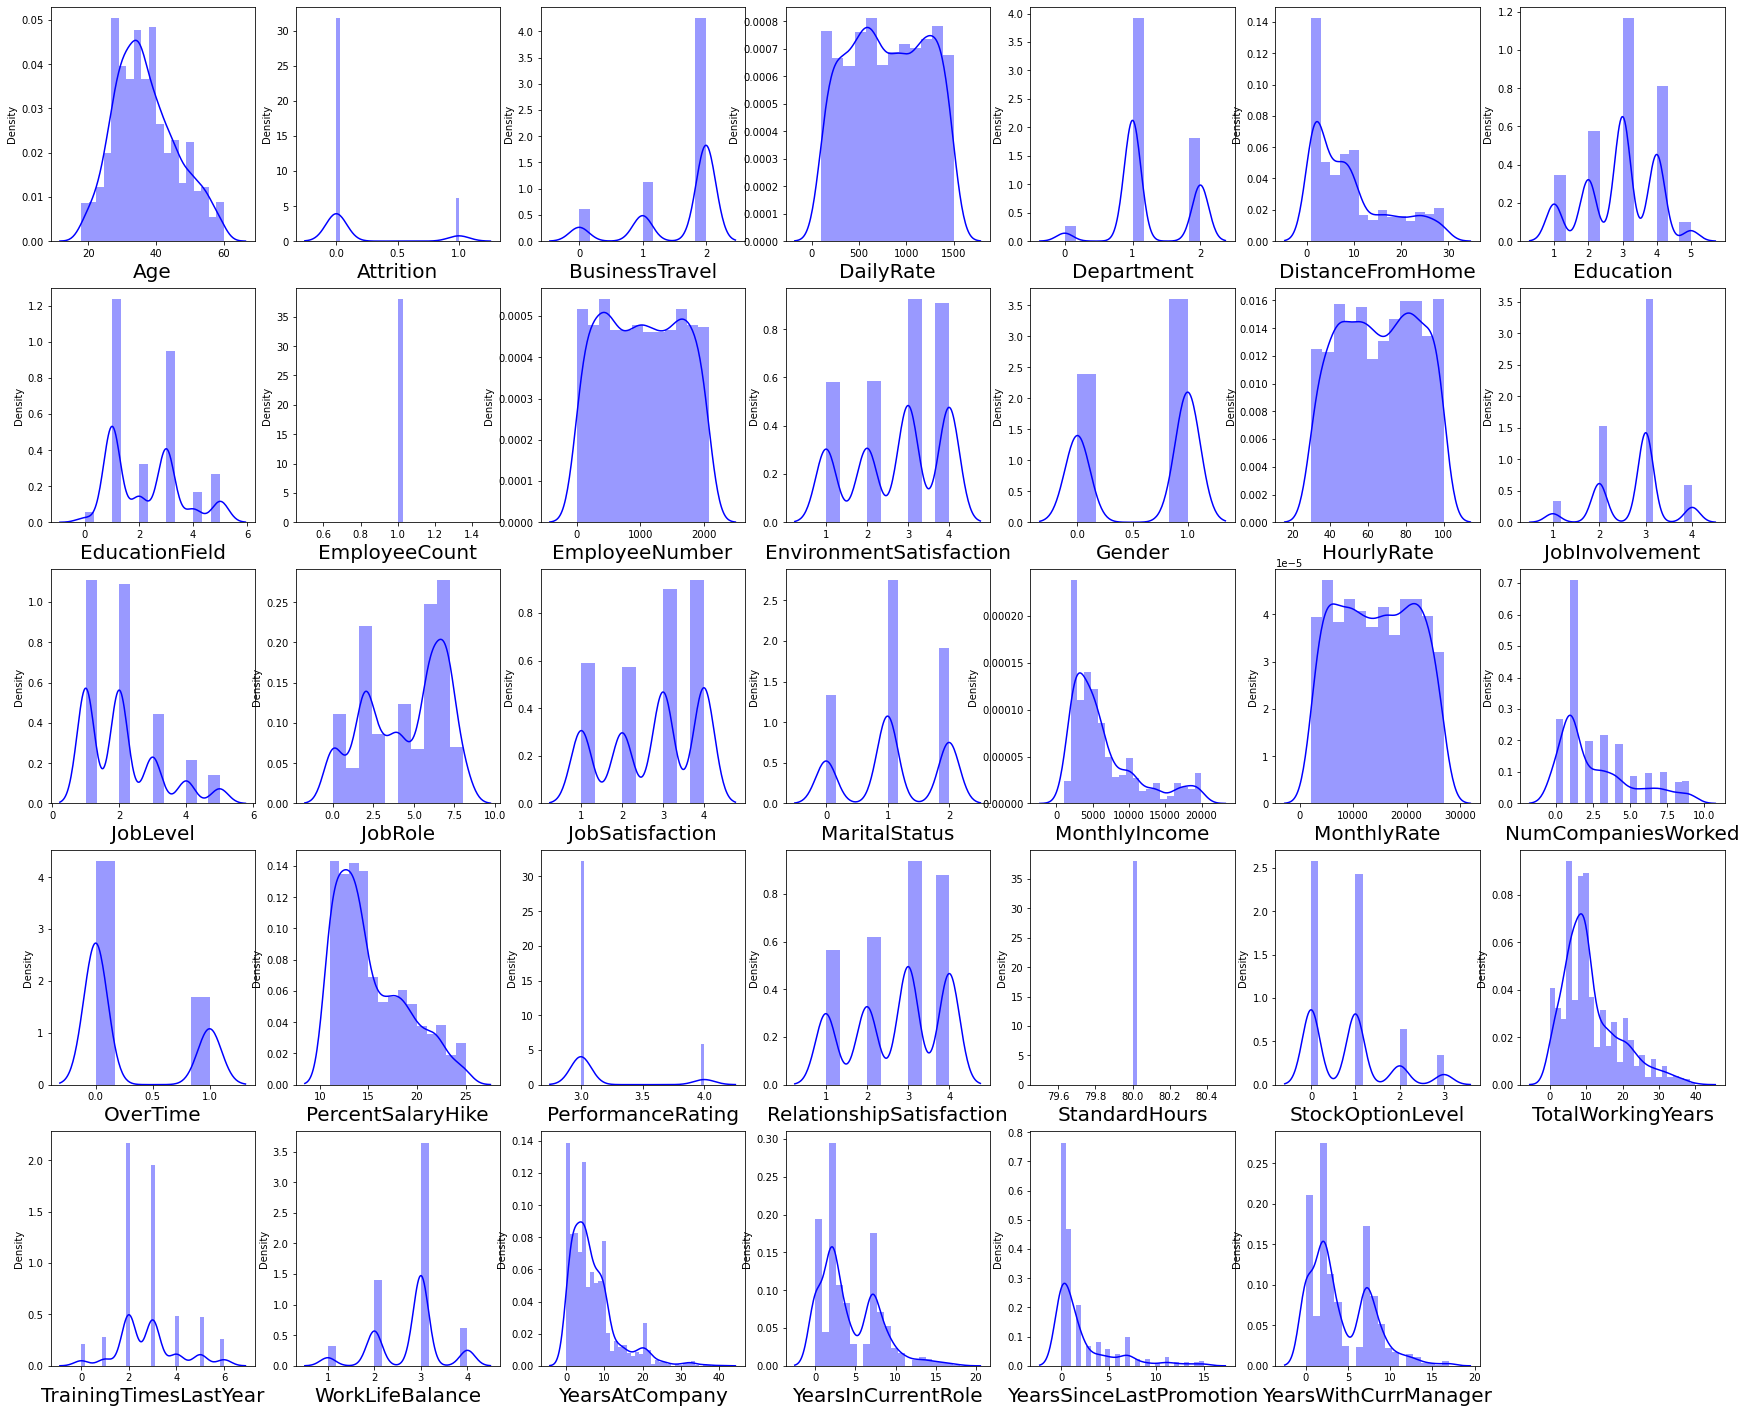

In [12]:
#Visualize the data distribution
plt.figure(figsize = (30,25))
n = 1

for column in df:
    if n <=34:
        ax = plt.subplot(5,7,n)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=20)
        
    n+=1
plt.show()

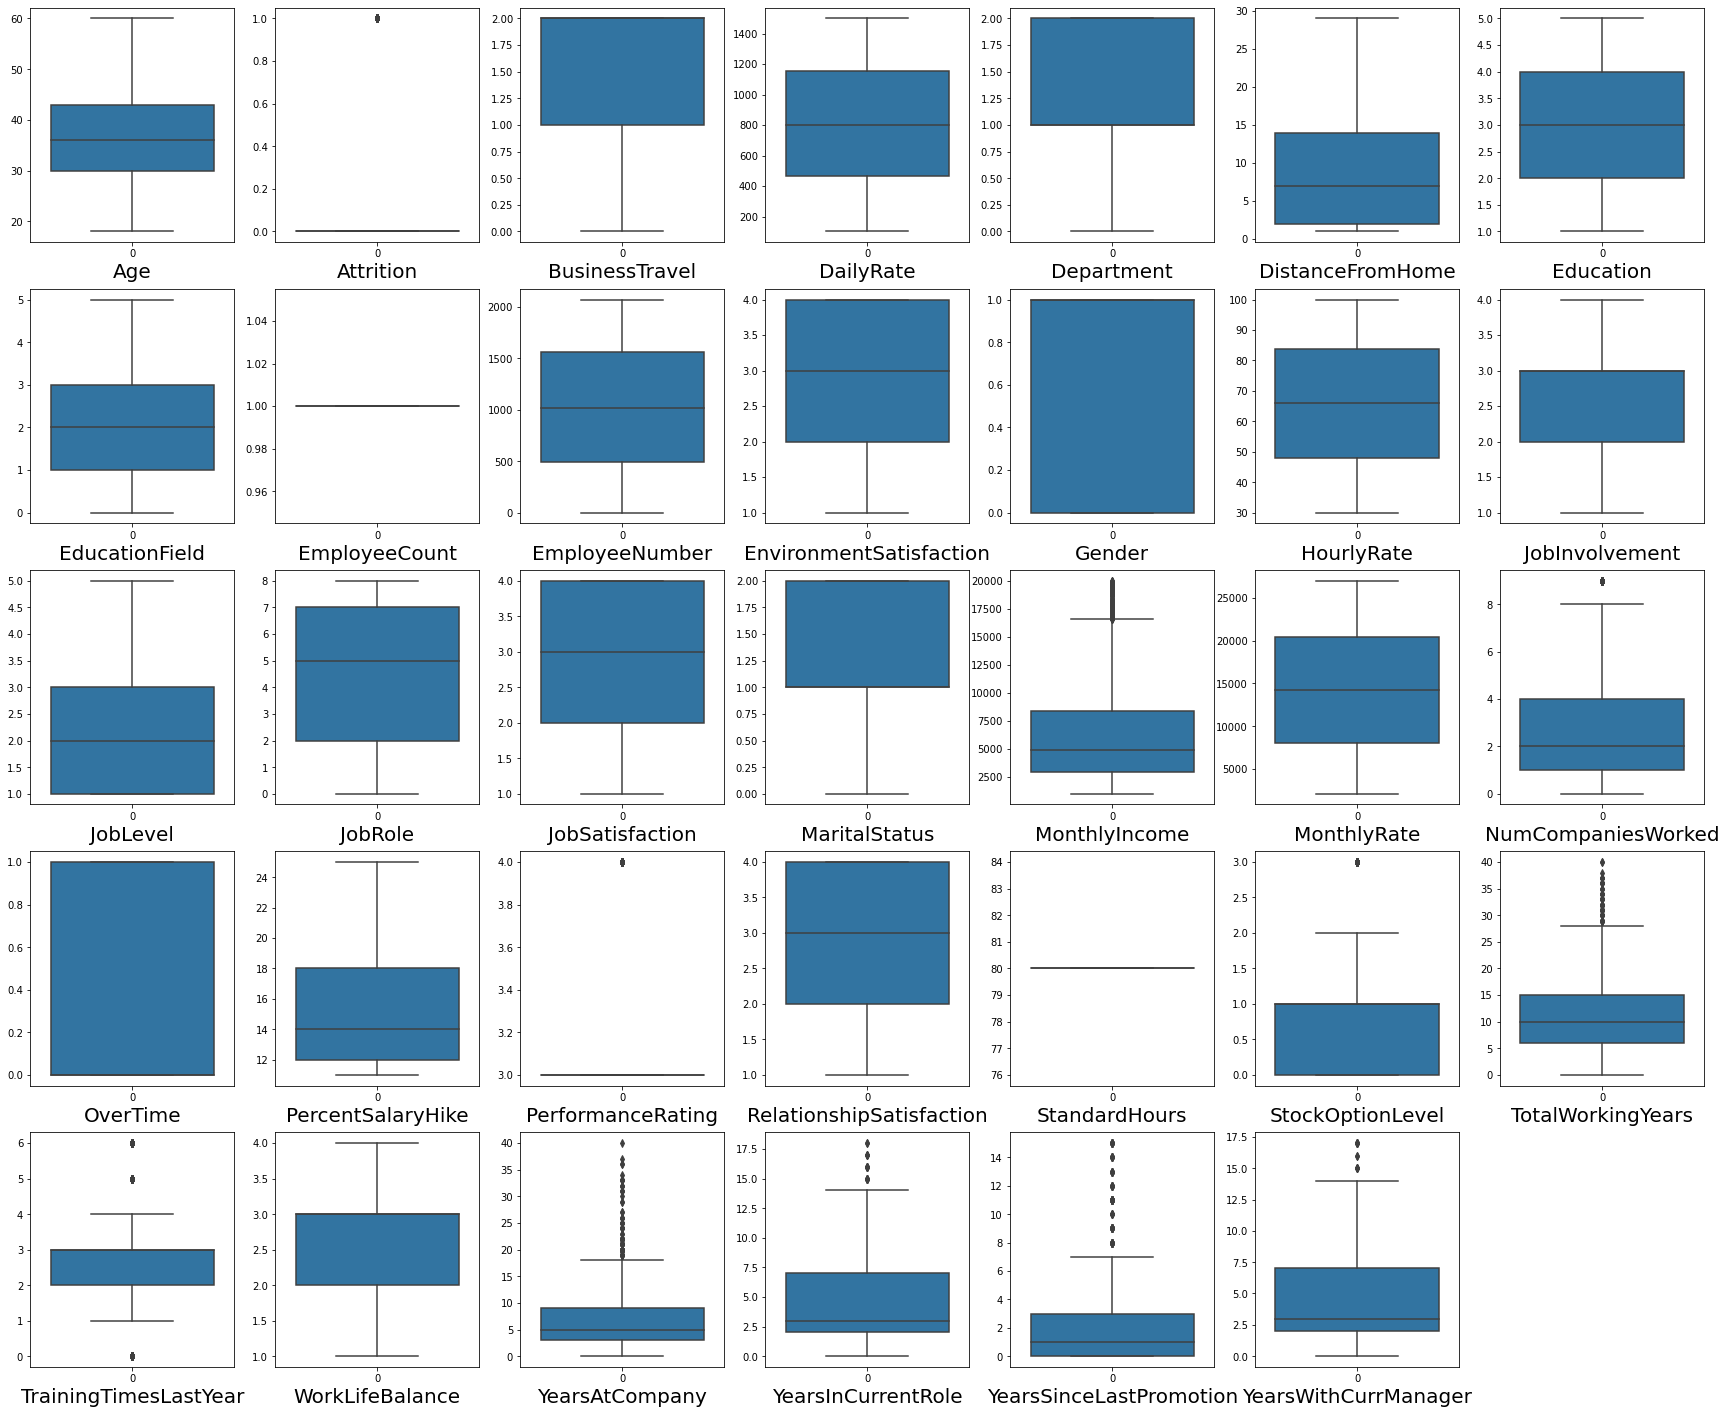

In [13]:
#Let's visualize the data using boxplot
plt.figure(figsize=(30,25))
n=1
for column in df:
    if n<=34:
        ax=plt.subplot(5,7,n)
        sns.boxplot(data=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    n+=1
plt.show()

There exists outliers in MonthlyIncome,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.

In [27]:
df_temp = df.copy(deep=True)
q1 = df_temp.quantile(0.25)
q3 = df_temp.quantile(0.75)
iqr = q3-q1

In [28]:
ttly_low = (q1.TrainingTimesLastYear-(1.5*iqr.TrainingTimesLastYear))
print(ttly_low)
index = np.where(df_temp['TrainingTimesLastYear'] < ttly_low)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

0.5
(1416, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         1   49          0               1        279           1   
1         2   37          1               2       1373           1   
2         3   33          0               1       1392           1   
3         4   27          0               2        591           1   
4         5   32          0               1       1005           1   
...     ...  ...        ...             ...        ...         ...   
1411   1464   26          0               2       1167           2   
1412   1465   36          0               1        884           1   
1413   1466   39          0               2        613           1   
1414   1468   49          0               1       1023           2   
1415   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    8          1               1              1  ...   
1                    2          2               4              1  ...   
2                    3          4               1              1  ...   
3                    2          1               3              1  ...   
4                    2          2               1              1  ...   
...                ...        ...             ...            ...  ...   
1411                 5          3               4              1  ...   
1412                23          2               3              1  ...   
1413                 6          1               3              1  ...   
1414                 2          3               3              1  ...   
1415                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            4             80                 1   
1                            2             80                 0   
2                            3             80                 0   
3                            4             80                 1   
4                            3             80                 0   
...                        ...            ...               ...   
1411                         4             80                 0   
1412                         3             80                 1   
1413                         1             80                 1   
1414                         4             80                 0   
1415                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    10                      3                3   
1                     7                      3                3   
2                     8                      3                3   
3                     6                      3                3   
4                     8                      2                2   
...                 ...                    ...              ...   
1411                  5                      2                3   
1412                 17                      3                3   
1413                  9                      5                3   
1414                 17                      3                2   
1415                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 10                   7                        1   
1                  0                   0                        0   
2                  8                   7                        3   
3                  2                   2                        2   
4                  7                   7                        3   
...              ...                 ...                      ...   
1411               4                   2                        0   
1412               5                   2                        0   
1413               7                   7                 

In [29]:
mi_high = (q3.MonthlyIncome+(1.5*iqr.MonthlyIncome))
print(mi_high)
index = np.where(df_temp['MonthlyIncome'] > mi_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

16581.0
(1305, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         1   49          0               1        279           1   
1         2   37          1               2       1373           1   
2         3   33          0               1       1392           1   
3         4   27          0               2        591           1   
4         5   32          0               1       1005           1   
...     ...  ...        ...             ...        ...         ...   
1300   1464   26          0               2       1167           2   
1301   1465   36          0               1        884           1   
1302   1466   39          0               2        613           1   
1303   1468   49          0               1       1023           2   
1304   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    8          1               1              1  ...   
1                    2          2               4              1  ...   
2                    3          4               1              1  ...   
3                    2          1               3              1  ...   
4                    2          2               1              1  ...   
...                ...        ...             ...            ...  ...   
1300                 5          3               4              1  ...   
1301                23          2               3              1  ...   
1302                 6          1               3              1  ...   
1303                 2          3               3              1  ...   
1304                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            4             80                 1   
1                            2             80                 0   
2                            3             80                 0   
3                            4             80                 1   
4                            3             80                 0   
...                        ...            ...               ...   
1300                         4             80                 0   
1301                         3             80                 1   
1302                         1             80                 1   
1303                         4             80                 0   
1304                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    10                      3                3   
1                     7                      3                3   
2                     8                      3                3   
3                     6                      3                3   
4                     8                      2                2   
...                 ...                    ...              ...   
1300                  5                      2                3   
1301                 17                      3                3   
1302                  9                      5                3   
1303                 17                      3                2   
1304                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 10                   7                        1   
1                  0                   0                        0   
2                  8                   7                        3   
3                  2                   2                        2   
4                  7                   7                        3   
...              ...                 ...                      ...   
1300               4                   2                        0   
1301               5                   2                        0   
1302               7                   7                 

In [30]:
pr_high = (q3.PerformanceRating+(1.5*iqr.PerformanceRating))
print(pr_high)
index = np.where(df_temp['PerformanceRating'] > pr_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

3.0
(1105, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         2   37          1               2       1373           1   
1         3   33          0               1       1392           1   
2         4   27          0               2        591           1   
3         5   32          0               1       1005           1   
4         9   36          0               2       1299           1   
...     ...  ...        ...             ...        ...         ...   
1100   1464   26          0               2       1167           2   
1101   1465   36          0               1        884           1   
1102   1466   39          0               2        613           1   
1103   1468   49          0               1       1023           2   
1104   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    2          2               4              1  ...   
1                    3          4               1              1  ...   
2                    2          1               3              1  ...   
3                    2          2               1              1  ...   
4                   27          3               3              1  ...   
...                ...        ...             ...            ...  ...   
1100                 5          3               4              1  ...   
1101                23          2               3              1  ...   
1102                 6          1               3              1  ...   
1103                 2          3               3              1  ...   
1104                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            2             80                 0   
1                            3             80                 0   
2                            4             80                 1   
3                            3             80                 0   
4                            2             80                 2   
...                        ...            ...               ...   
1100                         4             80                 0   
1101                         3             80                 1   
1102                         1             80                 1   
1103                         4             80                 0   
1104                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     7                      3                3   
1                     8                      3                3   
2                     6                      3                3   
3                     8                      2                2   
4                    17                      3                2   
...                 ...                    ...              ...   
1100                  5                      2                3   
1101                 17                      3                3   
1102                  9                      5                3   
1103                 17                      3                2   
1104                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                   0                        0   
1                  8                   7                        3   
2                  2                   2                        2   
3                  7                   7                        3   
4                  7                   7                        7   
...              ...                 ...                      ...   
1100               4                   2                        0   
1101               5                   2                        0   
1102               7                   7                 

In [31]:
sol_high = (q3.StockOptionLevel+(1.5*iqr.StockOptionLevel))
print(sol_high)
index = np.where(df_temp['StockOptionLevel'] > sol_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

2.5
(1036, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         2   37          1               2       1373           1   
1         3   33          0               1       1392           1   
2         4   27          0               2        591           1   
3         5   32          0               1       1005           1   
4         9   36          0               2       1299           1   
...     ...  ...        ...             ...        ...         ...   
1031   1464   26          0               2       1167           2   
1032   1465   36          0               1        884           1   
1033   1466   39          0               2        613           1   
1034   1468   49          0               1       1023           2   
1035   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    2          2               4              1  ...   
1                    3          4               1              1  ...   
2                    2          1               3              1  ...   
3                    2          2               1              1  ...   
4                   27          3               3              1  ...   
...                ...        ...             ...            ...  ...   
1031                 5          3               4              1  ...   
1032                23          2               3              1  ...   
1033                 6          1               3              1  ...   
1034                 2          3               3              1  ...   
1035                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            2             80                 0   
1                            3             80                 0   
2                            4             80                 1   
3                            3             80                 0   
4                            2             80                 2   
...                        ...            ...               ...   
1031                         4             80                 0   
1032                         3             80                 1   
1033                         1             80                 1   
1034                         4             80                 0   
1035                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     7                      3                3   
1                     8                      3                3   
2                     6                      3                3   
3                     8                      2                2   
4                    17                      3                2   
...                 ...                    ...              ...   
1031                  5                      2                3   
1032                 17                      3                3   
1033                  9                      5                3   
1034                 17                      3                2   
1035                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                   0                        0   
1                  8                   7                        3   
2                  2                   2                        2   
3                  7                   7                        3   
4                  7                   7                        7   
...              ...                 ...                      ...   
1031               4                   2                        0   
1032               5                   2                        0   
1033               7                   7                 

In [32]:
twy_high = (q3.TotalWorkingYears+(1.5*iqr.TotalWorkingYears))
print(twy_high)
index = np.where(df_temp['TotalWorkingYears'] > twy_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

28.5
(1013, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         2   37          1               2       1373           1   
1         3   33          0               1       1392           1   
2         4   27          0               2        591           1   
3         5   32          0               1       1005           1   
4         9   36          0               2       1299           1   
...     ...  ...        ...             ...        ...         ...   
1008   1464   26          0               2       1167           2   
1009   1465   36          0               1        884           1   
1010   1466   39          0               2        613           1   
1011   1468   49          0               1       1023           2   
1012   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    2          2               4              1  ...   
1                    3          4               1              1  ...   
2                    2          1               3              1  ...   
3                    2          2               1              1  ...   
4                   27          3               3              1  ...   
...                ...        ...             ...            ...  ...   
1008                 5          3               4              1  ...   
1009                23          2               3              1  ...   
1010                 6          1               3              1  ...   
1011                 2          3               3              1  ...   
1012                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            2             80                 0   
1                            3             80                 0   
2                            4             80                 1   
3                            3             80                 0   
4                            2             80                 2   
...                        ...            ...               ...   
1008                         4             80                 0   
1009                         3             80                 1   
1010                         1             80                 1   
1011                         4             80                 0   
1012                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     7                      3                3   
1                     8                      3                3   
2                     6                      3                3   
3                     8                      2                2   
4                    17                      3                2   
...                 ...                    ...              ...   
1008                  5                      2                3   
1009                 17                      3                3   
1010                  9                      5                3   
1011                 17                      3                2   
1012                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                   0                        0   
1                  8                   7                        3   
2                  2                   2                        2   
3                  7                   7                        3   
4                  7                   7                        7   
...              ...                 ...                      ...   
1008               4                   2                        0   
1009               5                   2                        0   
1010               7                   7                 

In [33]:
ttly_high = (q3.TrainingTimesLastYear+(1.5*iqr.TrainingTimesLastYear))
print(ttly_high)
index = np.where(df_temp['TrainingTimesLastYear'] > ttly_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

4.5
(877, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0        2   37          1               2       1373           1   
1        3   33          0               1       1392           1   
2        4   27          0               2        591           1   
3        5   32          0               1       1005           1   
4        9   36          0               2       1299           1   
..     ...  ...        ...             ...        ...         ...   
872   1463   31          0               0        325           1   
873   1464   26          0               2       1167           2   
874   1465   36          0               1        884           1   
875   1468   49          0               1       1023           2   
876   1469   34          0               2        628           1   

     DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                   2          2               4              1  ...   
1                   3          4               1              1  ...   
2                   2          1               3              1  ...   
3                   2          2               1              1  ...   
4                  27          3               3              1  ...   
..                ...        ...             ...            ...  ...   
872                 5          3               3              1  ...   
873                 5          3               4              1  ...   
874                23          2               3              1  ...   
875                 2          3               3              1  ...   
876                 8          3               3              1  ...   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                           2             80                 0   
1                           3             80                 0   
2                           4             80                 1   
3                           3             80                 0   
4                           2             80                 2   
..                        ...            ...               ...   
872                         2             80                 0   
873                         4             80                 0   
874                         3             80                 1   
875                         4             80                 0   
876                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    7                      3                3   
1                    8                      3                3   
2                    6                      3                3   
3                    8                      2                2   
4                   17                      3                2   
..                 ...                    ...              ...   
872                 10                      2                3   
873                  5                      2                3   
874                 17                      3                3   
875                 17                      3                2   
876                  6                      3                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 0                   0                        0   
1                 8                   7                        3   
2                 2                   2                        2   
3                 7                   7                        3   
4                 7                   7                        7   
..              ...                 ...                      ...   
872               9                   4                        1   
873               4                   2                        0   
874               5                   2                        0   
875               9                   6      

In [34]:
yac_high = (q3.YearsAtCompany+(1.5*iqr.YearsAtCompany))
print(yac_high)
index = np.where(df_temp['YearsAtCompany'] > yac_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

18.0
(846, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0        2   37          1               2       1373           1   
1        3   33          0               1       1392           1   
2        4   27          0               2        591           1   
3        5   32          0               1       1005           1   
4        9   36          0               2       1299           1   
..     ...  ...        ...             ...        ...         ...   
841   1463   31          0               0        325           1   
842   1464   26          0               2       1167           2   
843   1465   36          0               1        884           1   
844   1468   49          0               1       1023           2   
845   1469   34          0               2        628           1   

     DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                   2          2               4              1  ...   
1                   3          4               1              1  ...   
2                   2          1               3              1  ...   
3                   2          2               1              1  ...   
4                  27          3               3              1  ...   
..                ...        ...             ...            ...  ...   
841                 5          3               3              1  ...   
842                 5          3               4              1  ...   
843                23          2               3              1  ...   
844                 2          3               3              1  ...   
845                 8          3               3              1  ...   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                           2             80                 0   
1                           3             80                 0   
2                           4             80                 1   
3                           3             80                 0   
4                           2             80                 2   
..                        ...            ...               ...   
841                         2             80                 0   
842                         4             80                 0   
843                         3             80                 1   
844                         4             80                 0   
845                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    7                      3                3   
1                    8                      3                3   
2                    6                      3                3   
3                    8                      2                2   
4                   17                      3                2   
..                 ...                    ...              ...   
841                 10                      2                3   
842                  5                      2                3   
843                 17                      3                3   
844                 17                      3                2   
845                  6                      3                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 0                   0                        0   
1                 8                   7                        3   
2                 2                   2                        2   
3                 7                   7                        3   
4                 7                   7                        7   
..              ...                 ...                      ...   
841               9                   4                        1   
842               4                   2                        0   
843               5                   2                        0   
844               9                   6      

In [35]:
yicr_high = (q3.YearsInCurrentRole+(1.5*iqr.YearsInCurrentRole))
print(yicr_high)
index = np.where(df_temp['YearsInCurrentRole'] > yicr_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

14.5
(843, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0        2   37          1               2       1373           1   
1        3   33          0               1       1392           1   
2        4   27          0               2        591           1   
3        5   32          0               1       1005           1   
4        9   36          0               2       1299           1   
..     ...  ...        ...             ...        ...         ...   
838   1463   31          0               0        325           1   
839   1464   26          0               2       1167           2   
840   1465   36          0               1        884           1   
841   1468   49          0               1       1023           2   
842   1469   34          0               2        628           1   

     DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                   2          2               4              1  ...   
1                   3          4               1              1  ...   
2                   2          1               3              1  ...   
3                   2          2               1              1  ...   
4                  27          3               3              1  ...   
..                ...        ...             ...            ...  ...   
838                 5          3               3              1  ...   
839                 5          3               4              1  ...   
840                23          2               3              1  ...   
841                 2          3               3              1  ...   
842                 8          3               3              1  ...   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                           2             80                 0   
1                           3             80                 0   
2                           4             80                 1   
3                           3             80                 0   
4                           2             80                 2   
..                        ...            ...               ...   
838                         2             80                 0   
839                         4             80                 0   
840                         3             80                 1   
841                         4             80                 0   
842                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    7                      3                3   
1                    8                      3                3   
2                    6                      3                3   
3                    8                      2                2   
4                   17                      3                2   
..                 ...                    ...              ...   
838                 10                      2                3   
839                  5                      2                3   
840                 17                      3                3   
841                 17                      3                2   
842                  6                      3                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 0                   0                        0   
1                 8                   7                        3   
2                 2                   2                        2   
3                 7                   7                        3   
4                 7                   7                        7   
..              ...                 ...                      ...   
838               9                   4                        1   
839               4                   2                        0   
840               5                   2                        0   
841               9                   6      

In [36]:
yslp_high = (q3.YearsSinceLastPromotion+(1.5*iqr.YearsSinceLastPromotion))
print(yslp_high)
index = np.where(df_temp['YearsSinceLastPromotion'] > yslp_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

7.5
(814, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0        2   37          1               2       1373           1   
1        3   33          0               1       1392           1   
2        4   27          0               2        591           1   
3        5   32          0               1       1005           1   
4        9   36          0               2       1299           1   
..     ...  ...        ...             ...        ...         ...   
809   1463   31          0               0        325           1   
810   1464   26          0               2       1167           2   
811   1465   36          0               1        884           1   
812   1468   49          0               1       1023           2   
813   1469   34          0               2        628           1   

     DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                   2          2               4              1  ...   
1                   3          4               1              1  ...   
2                   2          1               3              1  ...   
3                   2          2               1              1  ...   
4                  27          3               3              1  ...   
..                ...        ...             ...            ...  ...   
809                 5          3               3              1  ...   
810                 5          3               4              1  ...   
811                23          2               3              1  ...   
812                 2          3               3              1  ...   
813                 8          3               3              1  ...   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                           2             80                 0   
1                           3             80                 0   
2                           4             80                 1   
3                           3             80                 0   
4                           2             80                 2   
..                        ...            ...               ...   
809                         2             80                 0   
810                         4             80                 0   
811                         3             80                 1   
812                         4             80                 0   
813                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    7                      3                3   
1                    8                      3                3   
2                    6                      3                3   
3                    8                      2                2   
4                   17                      3                2   
..                 ...                    ...              ...   
809                 10                      2                3   
810                  5                      2                3   
811                 17                      3                3   
812                 17                      3                2   
813                  6                      3                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 0                   0                        0   
1                 8                   7                        3   
2                 2                   2                        2   
3                 7                   7                        3   
4                 7                   7                        7   
..              ...                 ...                      ...   
809               9                   4                        1   
810               4                   2                        0   
811               5                   2                        0   
812               9                   6      

In [37]:
ywcm_high = (q3.YearsWithCurrManager+(1.5*iqr.YearsWithCurrManager))
print(ywcm_high)
index = np.where(df_temp['YearsWithCurrManager'] > ywcm_high)
df_temp = df_temp.drop(df_temp.index[index])
print(df_temp.shape)
df_temp.reset_index()

14.5
(812, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0        2   37          1               2       1373           1   
1        3   33          0               1       1392           1   
2        4   27          0               2        591           1   
3        5   32          0               1       1005           1   
4        9   36          0               2       1299           1   
..     ...  ...        ...             ...        ...         ...   
807   1463   31          0               0        325           1   
808   1464   26          0               2       1167           2   
809   1465   36          0               1        884           1   
810   1468   49          0               1       1023           2   
811   1469   34          0               2        628           1   

     DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                   2          2               4              1  ...   
1                   3          4               1              1  ...   
2                   2          1               3              1  ...   
3                   2          2               1              1  ...   
4                  27          3               3              1  ...   
..                ...        ...             ...            ...  ...   
807                 5          3               3              1  ...   
808                 5          3               4              1  ...   
809                23          2               3              1  ...   
810                 2          3               3              1  ...   
811                 8          3               3              1  ...   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                           2             80                 0   
1                           3             80                 0   
2                           4             80                 1   
3                           3             80                 0   
4                           2             80                 2   
..                        ...            ...               ...   
807                         2             80                 0   
808                         4             80                 0   
809                         3             80                 1   
810                         4             80                 0   
811                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    7                      3                3   
1                    8                      3                3   
2                    6                      3                3   
3                    8                      2                2   
4                   17                      3                2   
..                 ...                    ...              ...   
807                 10                      2                3   
808                  5                      2                3   
809                 17                      3                3   
810                 17                      3                2   
811                  6                      3                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 0                   0                        0   
1                 8                   7                        3   
2                 2                   2                        2   
3                 7                   7                        3   
4                 7                   7                        7   
..              ...                 ...                      ...   
807               9                   4                        1   
808               4                   2                        0   
809               5                   2                        0   
810               9                   6      

In [38]:
df_temp.shape

(812, 34)

In [39]:
#Checking dataloss
Dataloss = (((1470-812)/1470)*100)
print(Dataloss)

44.761904761904766


Around 44% data will be removed if i remove all the outliers which is not acceptable. so let me deep dive into each feature which has outliers and see whether i can remove them or not

TrainingTimesLastYear and PerformanceRating features outliers removal leading more data loss, As training for each associate differs based on the knowledge,education etc there might be vast range of data and also performance of each associate differs based on the experience projects etc so let me not remove outliers in these 2 features.
MonthlyIncome also varies for each associate based on the experience, performance etc
So except StockOptionLevel,YearsInCurrentRole and YearsWithCurrManager i feel i cannot remove outliers for any other features

In [62]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

In [63]:
sol_high = (q3.StockOptionLevel+(1.5*iqr.StockOptionLevel))
print(sol_high)
index = np.where(df['StockOptionLevel'] > sol_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

2.5
(1385, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         0   41          1               2       1102           2   
1         1   49          0               1        279           1   
2         2   37          1               2       1373           1   
3         3   33          0               1       1392           1   
4         4   27          0               2        591           1   
...     ...  ...        ...             ...        ...         ...   
1380   1465   36          0               1        884           1   
1381   1466   39          0               2        613           1   
1382   1467   27          0               2        155           1   
1383   1468   49          0               1       1023           2   
1384   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    1          2               1              1  ...   
1                    8          1               1              1  ...   
2                    2          2               4              1  ...   
3                    3          4               1              1  ...   
4                    2          1               3              1  ...   
...                ...        ...             ...            ...  ...   
1380                23          2               3              1  ...   
1381                 6          1               3              1  ...   
1382                 4          3               1              1  ...   
1383                 2          3               3              1  ...   
1384                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1380                         3             80                 1   
1381                         1             80                 1   
1382                         2             80                 1   
1383                         4             80                 0   
1384                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1380                 17                      3                3   
1381                  9                      5                3   
1382                  6                      0                3   
1383                 17                      3                2   
1384                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1380               5                   2                        0   
1381               7                   7                        1   
1382               6                   2                 

In [64]:
yicr_high = (q3.YearsInCurrentRole+(1.5*iqr.YearsInCurrentRole))
print(yicr_high)
index = np.where(df['YearsInCurrentRole'] > yicr_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

14.5
(1364, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         0   41          1               2       1102           2   
1         1   49          0               1        279           1   
2         2   37          1               2       1373           1   
3         3   33          0               1       1392           1   
4         4   27          0               2        591           1   
...     ...  ...        ...             ...        ...         ...   
1359   1465   36          0               1        884           1   
1360   1466   39          0               2        613           1   
1361   1467   27          0               2        155           1   
1362   1468   49          0               1       1023           2   
1363   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    1          2               1              1  ...   
1                    8          1               1              1  ...   
2                    2          2               4              1  ...   
3                    3          4               1              1  ...   
4                    2          1               3              1  ...   
...                ...        ...             ...            ...  ...   
1359                23          2               3              1  ...   
1360                 6          1               3              1  ...   
1361                 4          3               1              1  ...   
1362                 2          3               3              1  ...   
1363                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1359                         3             80                 1   
1360                         1             80                 1   
1361                         2             80                 1   
1362                         4             80                 0   
1363                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1359                 17                      3                3   
1360                  9                      5                3   
1361                  6                      0                3   
1362                 17                      3                2   
1363                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1359               5                   2                        0   
1360               7                   7                        1   
1361               6                   2                 

In [65]:
ywcm_high = (q3.YearsWithCurrManager+(1.5*iqr.YearsWithCurrManager))
print(ywcm_high)
index = np.where(df['YearsWithCurrManager'] > ywcm_high)
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

14.5
(1353, 34)


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         0   41          1               2       1102           2   
1         1   49          0               1        279           1   
2         2   37          1               2       1373           1   
3         3   33          0               1       1392           1   
4         4   27          0               2        591           1   
...     ...  ...        ...             ...        ...         ...   
1348   1465   36          0               1        884           1   
1349   1466   39          0               2        613           1   
1350   1467   27          0               2        155           1   
1351   1468   49          0               1       1023           2   
1352   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                    1          2               1              1  ...   
1                    8          1               1              1  ...   
2                    2          2               4              1  ...   
3                    3          4               1              1  ...   
4                    2          1               3              1  ...   
...                ...        ...             ...            ...  ...   
1348                23          2               3              1  ...   
1349                 6          1               3              1  ...   
1350                 4          3               1              1  ...   
1351                 2          3               3              1  ...   
1352                 8          3               3              1  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1348                         3             80                 1   
1349                         1             80                 1   
1350                         2             80                 1   
1351                         4             80                 0   
1352                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1348                 17                      3                3   
1349                  9                      5                3   
1350                  6                      0                3   
1351                 17                      3                2   
1352                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1348               5                   2                        0   
1349               7                   7                        1   
1350               6                   2                 

In [66]:
df.shape

(1353, 34)

In [67]:
#Checking dataloss
Dataloss = (((1470-1353)/1470)*100)
print(Dataloss)

7.959183673469387


Now the data loss is almost 8% which is ok

In [78]:
# Feature selection process
# visualize relationship between features and label using heatmap
df_corr = df.corr()
plt.figure(figsize=(200,200))
res = sns.heatmap(df_corr,annot=True,annot_kws={'size':35})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 30)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 50)
plt.show()

In [81]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.165977        0.013465   0.004957   
Attrition                -0.165977   1.000000       -0.010068  -0.051805   
BusinessTravel            0.013465  -0.010068        1.000000   0.002646   
DailyRate                 0.004957  -0.051805        0.002646   1.000000   
Department               -0.035408   0.067953       -0.026042  -0.008177   
DistanceFromHome          0.006740   0.075958       -0.038786  -0.000113   
Education                 0.202776  -0.038317       -0.016370  -0.028160   
EducationField           -0.041943   0.034321        0.019937   0.042765   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber            0.005055  -0.014243       -0.012984  -0.055274   
EnvironmentSatisfaction   0.015040  -0.093494        0.001021   0.030695   
Gender                   -0.024807   0.026519       -0.034021  -0.005110   
HourlyRate                0.030416   0.010446        0.031360   0.010909   
JobInvolvement            0.007302  -0.140465        0.018688   0.044728   
JobLevel                  0.503962  -0.180023        0.003813   0.008370   
JobRole                  -0.133585   0.061604       -0.000068  -0.007971   
JobSatisfaction           0.011850  -0.109799       -0.020118   0.044722   
MaritalStatus            -0.110074   0.171214        0.014860  -0.062025   
MonthlyIncome             0.491818  -0.169068        0.020957   0.014784   
MonthlyRate               0.034609   0.012320       -0.010182  -0.038024   
NumCompaniesWorked        0.287578   0.022504        0.012968   0.031979   
OverTime                  0.023581   0.238864        0.007122   0.015020   
PercentSalaryHike         0.003926  -0.016606       -0.031466   0.032282   
PerformanceRating        -0.008900   0.006546       -0.018727  -0.003649   
RelationshipSatisfaction  0.057904  -0.053198       -0.014665   0.002773   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.058812  -0.192863        0.001654   0.021283   
TotalWorkingYears         0.671684  -0.176254        0.013362   0.015362   
TrainingTimesLastYear    -0.003410  -0.052537        0.021745   0.011051   
WorkLifeBalance          -0.024346  -0.073814       -0.014586  -0.039632   
YearsAtCompany            0.287085  -0.134456       -0.043558  -0.028427   
YearsInCurrentRole        0.185938  -0.159647       -0.033993   0.011983   
YearsSinceLastPromotion   0.197065  -0.031995       -0.063499  -0.038825   
YearsWithCurrManager      0.178483  -0.152533       -0.061041  -0.015876   

                          Department  DistanceFromHome  Education  \
Age                        -0.035408          0.006740   0.202776   
Attrition                   0.067953          0.075958  -0.038317   
BusinessTravel             -0.026042         -0.038786  -0.016370   
DailyRate                  -0.008177         -0.000113  -0.028160   
Department                  1.000000          0.023420   0.007973   
DistanceFromHome            0.023420          1.000000   0.018989   
Education                   0.007973          0.018989   1.000000   
EducationField              0.013554         -0.004879  -0.032673   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.000451          0.034117   0.043028   
EnvironmentSatisfaction    -0.027141         -0.025912  -0.026120   
Gender                     -0.034376         -0.012002  -0.022903   
HourlyRate                 -0.005194          0.038826   0.022322   
JobInvolvement             -0.029302          0.008759   0.040952   
JobLevel                    0.101861          0.016638   0.085638   
JobRole                     0.668856         -0.001902  -0.001286   
JobSatisfaction             0.035150          0.009582  -0.000417   
MaritalStatus               0.047040         -0.024092  -0.005275   
MonthlyIncome               0.052463         -0.007141   0.

In [96]:
#Correlation with output variable
cor_target = abs(df_corr["Attrition"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Attrition    1.0
Name: Attrition, dtype: float64

Let me check the p values for better selection

In [99]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Attrition~Age+BusinessTravel+DailyRate+Department+DistanceFromHome+Education+EducationField+EmployeeCount+EmployeeNumber+EnvironmentSatisfaction+Gender+HourlyRate+JobInvolvement+JobLevel+JobRole+JobSatisfaction+MaritalStatus+MonthlyIncome+MonthlyRate+NumCompaniesWorked+OverTime+PercentSalaryHike+PerformanceRating+RelationshipSatisfaction+StandardHours+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+WorkLifeBalance+YearsAtCompany+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.01e-52
Time:                        22:09:27   Log-Likelihood:                -401.17
No. Observations:                1353   AIC:                             866.3
Df Residuals:                    1321   BIC:                             1033.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0001   2.13e-05      5.506      0.000    7.56e-05       0.000
Age                         -0.0036      0.001     -2.605      0.009      -0.006      -0.001
BusinessTravel              -0.0038      0.014     -0.277      0.782      -0.031       0.023
DailyRate                -2.868e-05   2.26e-05     -1.272      0.204   -7.29e-05    1.56e-05
Department                   0.0683      0.024      2.858      0.004       0.021       0.115
DistanceFromHome             0.0036      0.001      3.172      0.002       0.001       0.006
Education                   -0.0018      0.009     -0.203      0.839      -0.020       0.016
EducationField               0.0059      0.007      0.867      0.386      -0.007       0.019
EmployeeCount                0.0001   2.13e-05      5.506      0.000    7.56e-05       0.000
EmployeeNumber           -9.154e-06   1.51e-05     -0.608      0.543   -3.87e-05    2.04e-05
EnvironmentSatisfaction     -0.0342      0.008     -4.125      0.000      -0.050      -0.018
Gender                       0.0374      0.019      2.023      0.043       0.001       0.074
HourlyRate                   0.0001      0.000      0.265      0.791      -0.001       0.001
JobInvolvement              -0.0637      0.013     -4.948      0.000      -0.089      -0.038
JobLevel                    -0.0442      0.028     -1.579      0.115      -0.099       0.011
JobRole                     -0.0047      0.005     -0.942      0.347      -0.015       0.005
JobSatisfaction             -0.0392      0.008     -4.754      0.000      -0.055      -0.023
MaritalStatus                0.0350      0.018      1.965      0.050    5.65e-05       0.070
MonthlyIncome             1.216e-06   6.37e-06      0.191      0.849   -1.13e-05    1.37e-05
MonthlyRate               5.331e-07   1.28e-06      0.417      0.677   -1.97e-06    3.04e-06
NumCompaniesWorked           0.0128      0.004      3.144      0.002       0.005       0.021
OverTime                     0.2047      0.020     10.134      0.000       0.165       0.244
PercentSalaryHike           -0.0044      0.004     -1.133      0.257      -0.012       0.003
PerformanceRating            0.0358      0.039      0.912      0.362      -0.041       0.113
RelationshipSatisfaction    -0.0253      0.008     -3.019      0.003      -0.042      -0.009
StandardHours                0.0094      0.002      5.506      0.000       0.006       0.013
StockOptionLevel            -0.0651      0.019     -3.407      0.001      -0.103      -0.028
TotalWorkingYears           -0.0023      0.003     -0.899      0.369      -0.007       0.003
TrainingTimesLastYear       -0.0095      0.007     -1.356      0.175      -0.023       0.004
WorkLifeBalance             -0.0334      0.013     -2.640      0.008      -0.058      -0.009
YearsAtCompany

If we observe p values, i can see that below features having multicollinearity problem as their p value is greater than 0.05<br>
BusinessTravel<br>
DailyRate<br>
Education<br>
EducationField<br>
EmployeeNumber<br>
HourlyRate<br>
JobLevel<br>
JobRole<br>
MonthlyIncome<br>
MonthlyRate<br>
PercentSalaryHike<br>
PerformanceRating<br>
TotalWorkingYears<br>
TrainingTimesLastYear<br>
YearsAtCompany<br>

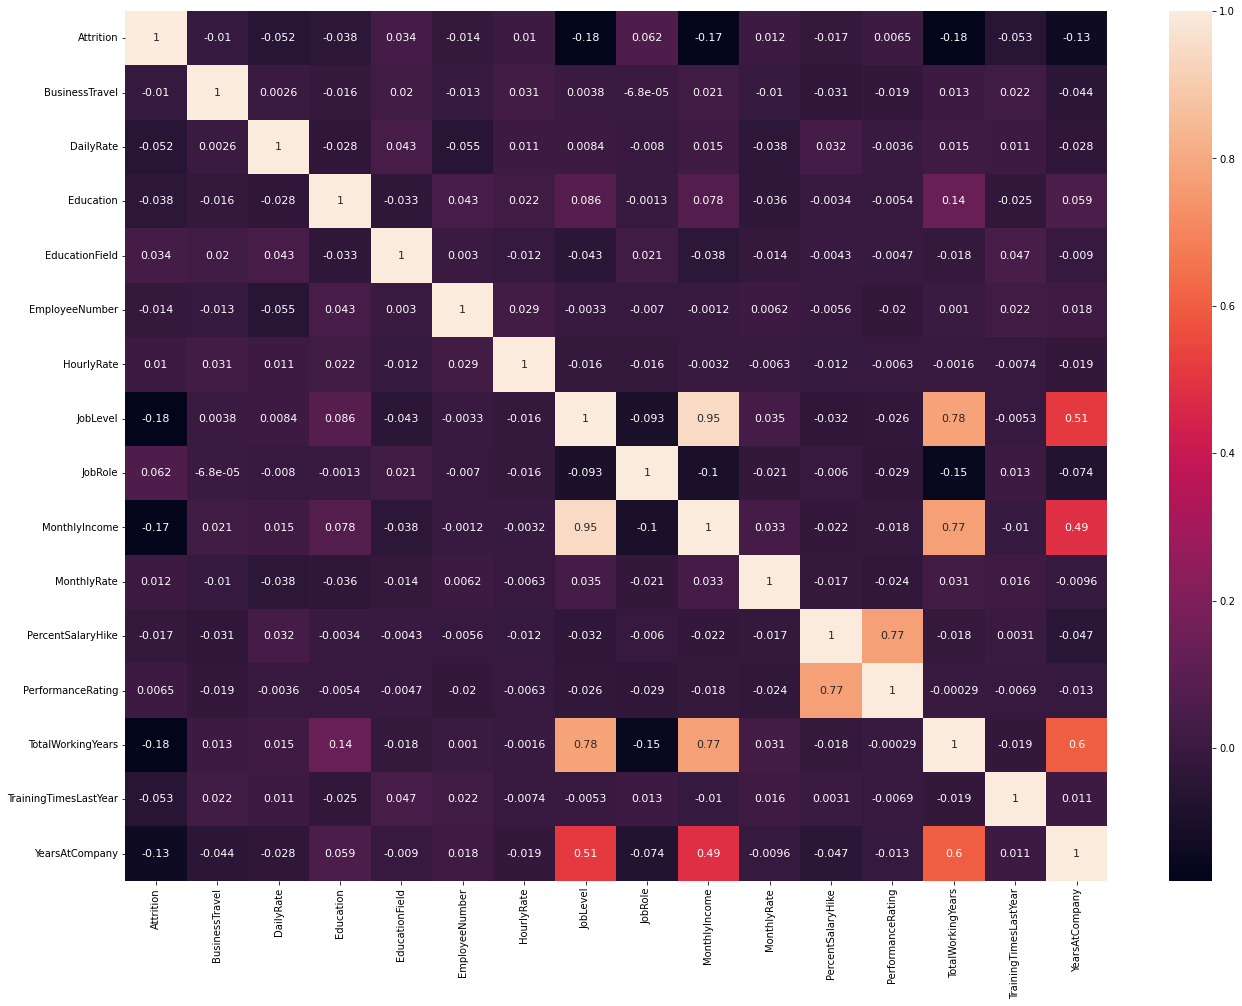

In [105]:
df_corr = df[['Attrition','BusinessTravel','DailyRate','Education','EducationField','EmployeeNumber','HourlyRate','JobLevel','JobRole','MonthlyIncome','MonthlyRate','PercentSalaryHike','PerformanceRating','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany']].corr()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':11})
plt.show()

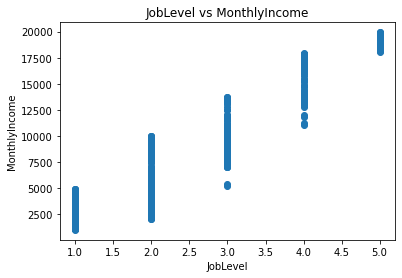

In [101]:
# Check if they are really related
plt.scatter(df['JobLevel'],df['MonthlyIncome'])
plt.xlabel('JobLevel')
plt.ylabel('MonthlyIncome')
plt.title('JobLevel vs MonthlyIncome')
plt.show()

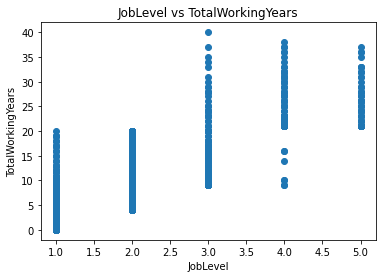

In [103]:
# Check if they are really related
plt.scatter(df['JobLevel'],df['TotalWorkingYears'])
plt.xlabel('JobLevel')
plt.ylabel('TotalWorkingYears')
plt.title('JobLevel vs TotalWorkingYears')
plt.show()

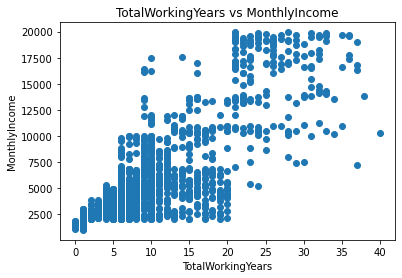

In [104]:
# Check if they are really related
plt.scatter(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.title('TotalWorkingYears vs MonthlyIncome')
plt.show()

We could see that JobLevel and MonthlyIncome are closed related and can drop JobLevel feature

In [106]:
df = df.drop('JobLevel',axis=1)

In [107]:
df.shape

(1353, 33)

As i can see still 33 features i will go with SelectKBest to choose 17 best features

In [108]:
x = df.drop('Attrition',axis=1)
y = df.Attrition

In [114]:
#Let me select 17 best features
best_features = SelectKBest(score_func=f_classif,k=17)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Featrure','Score']
print(feature_scores.nlargest(17,'Score'))

                    Featrure      Score
19                  OverTime  81.747005
24          StockOptionLevel  52.193632
25         TotalWorkingYears  43.314886
15             MaritalStatus  40.799646
16             MonthlyIncome  39.753512
0                        Age  38.272240
29        YearsInCurrentRole  35.333683
31      YearsWithCurrManager  32.181617
12            JobInvolvement  27.192232
28            YearsAtCompany  24.873576
14           JobSatisfaction  16.486111
9    EnvironmentSatisfaction  11.913513
4           DistanceFromHome   7.840061
27           WorkLifeBalance   7.401169
3                 Department   6.267373
13                   JobRole   5.146696
22  RelationshipSatisfaction   3.834183


In [115]:
x = df[['OverTime','StockOptionLevel','MaritalStatus','TotalWorkingYears','MonthlyIncome','Age','YearsInCurrentRole','YearsWithCurrManager','JobInvolvement','YearsAtCompany','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','WorkLifeBalance','Department','JobRole','RelationshipSatisfaction']]

In [116]:
#Split the data into 2 parts using Hold Out method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56)

In [117]:
# Model instantiation with default parameters
lr = LogisticRegression()
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       278
           1       1.00      0.13      0.23        61

    accuracy                           0.84       339
   macro avg       0.92      0.57      0.57       339
weighted avg       0.87      0.84      0.79       339



In [118]:
#Let us improve the accuracy using gridsearchcv
params = {'n_jobs':[1,2,3],'penalty':['l1','l2'],'max_iter':range(50,150,10)}
grid_search = GridSearchCV(lr,params,cv=10)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'max_iter': 120, 'n_jobs': 3, 'penalty': 'l2'}

In [119]:
lr = LogisticRegression(n_jobs=3,penalty='l2',max_iter=120)
# Train the model
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       278
           1       0.80      0.20      0.32        61

    accuracy                           0.85       339
   macro avg       0.82      0.59      0.61       339
weighted avg       0.84      0.85      0.81       339



Accuracy improved from 84% to 85% after hyperparameter tuning

In [120]:
#Check if model is overfitting
print(cross_val_score(lr,x,y,cv=5).mean())

0.8484788847888479


In [121]:
# model instantiation with default parameters
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       278
           1       0.32      0.30      0.31        61

    accuracy                           0.76       339
   macro avg       0.58      0.58      0.58       339
weighted avg       0.75      0.76      0.75       339



In [122]:
params = { 'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(2,8),'min_samples_split':range(3,8)}
grid_search = GridSearchCV(dtc,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 5}

In [123]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=7,min_samples_split=5)
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(classification_report(y_test,dtc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       278
           1       0.38      0.21      0.27        61

    accuracy                           0.80       339
   macro avg       0.61      0.57      0.58       339
weighted avg       0.76      0.80      0.77       339



Accuracy improved from 76% to 80% after hyperparameter tuning

In [124]:
#Check if model is overfitting
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8285554188875223


In [125]:
# Model instantiation with default parameters
rfc = RandomForestClassifier()
# Train the model
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       278
           1       0.82      0.15      0.25        61

    accuracy                           0.84       339
   macro avg       0.83      0.57      0.58       339
weighted avg       0.84      0.84      0.79       339



In [126]:
params = { 'n_estimators':[13,15],'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(5,6),'min_samples_split':range(10,11)}
grid_search = GridSearchCV(rfc,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 13}

In [127]:
rfc=RandomForestClassifier(n_estimators=13,criterion='gini',max_depth=13,min_samples_leaf=5,min_samples_split=10)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test,rfc_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       278
           1       0.71      0.20      0.31        61

    accuracy                           0.84       339
   macro avg       0.78      0.59      0.61       339
weighted avg       0.82      0.84      0.80       339



Not able to improve the performance even after hyperparameter tuning

In [128]:
#Check if model is overfitting
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8499548995489954


In [129]:
# Model instantiation with default parameters
knn = KNeighborsClassifier()
# Train the model
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       278
           1       0.38      0.08      0.14        61

    accuracy                           0.81       339
   macro avg       0.61      0.53      0.51       339
weighted avg       0.75      0.81      0.76       339



In [130]:
params = { 'algorithm':['kd_tree','brute'],'leaf_size':[1,2,3,4,5,6,7,8,10,11,14],'n_neighbors':[3,5,7,9,11,13,15,17]}
grid_search = GridSearchCV(knn,param_grid=params)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 17}

In [131]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=1,n_neighbors=17)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(classification_report(y_test,knn_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       278
           1       0.00      0.00      0.00        61

    accuracy                           0.82       339
   macro avg       0.41      0.50      0.45       339
weighted avg       0.67      0.82      0.74       339



Accuracy improved from 81% to 82% after hyperparameter tuning

In [132]:
#Check if model is overfitting
print(cross_val_score(knn,x,y,cv=5).mean())

0.8351865518655186


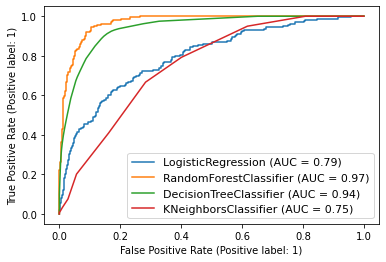

In [133]:
#let me plot roc curve to chose the best model
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dtc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

So based on the accuracy the best fit model is RandomForestClassifier

In [135]:
# save the model to disk
filename = 'HR_Analytics_Model.sav'
pickle.dump(rfc, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_test)
result

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [136]:
pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0    1    2    3    4    5    6    7    8    9    ...  329  330  \
Predicted    0    0    0    1    0    0    1    0    0    0  ...    0    0   
Original     0    0    1    1    1    0    1    0    0    1  ...    0    0   

           331  332  333  334  335  336  337  338  
Predicted    0    0    0    0    0    0    0    0  
Original     0    1    0    0    0    1    0    0  

[2 rows x 339 columns]